<a href="https://colab.research.google.com/github/natdebandi/migmobs/blob/main/GM_test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS

**Natalia Dedandi**

Exploratory analisys of Mobility dataset 2011-2016 (v1)

https://migrationpolicycentre.eu/global-mobilities/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/gm_argentina.csv'

df = pd.read_csv(file_path)
print(df.head())


Mounted at /content/drive
   source_name  target_name source_iso3 target_iso3  year  estimated_trips  \
0  Afghanistan       Rwanda         AFG         RWA  2014             29.0   
1  Afghanistan  Netherlands         AFG         NLD  2014           6991.0   
2  Afghanistan        Congo         AFG         COG  2011              0.0   
3  Afghanistan      Hungary         AFG         HUN  2012            308.0   
4  Afghanistan   Cabo Verde         AFG         CPV  2012              0.0   

       dist source_region target_region source_subregion    target_subregion  
0  5755.222          Asia        Africa    Southern Asia  Sub-Saharan Africa  
1  5361.400          Asia        Europe    Southern Asia      Western Europe  
2  7100.583          Asia        Africa    Southern Asia  Sub-Saharan Africa  
3  4367.694          Asia        Europe    Southern Asia      Eastern Europe  
4  9324.580          Asia        Africa    Southern Asia  Sub-Saharan Africa  


In [4]:
# Filter of countries of interest
countries = ['ARG', 'CHL', 'BOL', 'VEN']
latam_df = df[(df['source_iso3'].isin(countries)) & (df['target_iso3'].isin(countries))]
print(latam_df.head())

     source_name                         target_name source_iso3 target_iso3  \
7038   Argentina                               Chile         ARG         CHL   
7044   Argentina  Venezuela (Bolivarian Republic of)         ARG         VEN   
7091   Argentina                               Chile         ARG         CHL   
7155   Argentina  Venezuela (Bolivarian Republic of)         ARG         VEN   
7229   Argentina                               Chile         ARG         CHL   

      year  estimated_trips      dist source_region target_region  \
7038  2012        2511491.0  1128.317      Americas      Americas   
7044  2013         144393.0  5114.314      Americas      Americas   
7091  2015        3089193.0  1128.317      Americas      Americas   
7155  2015         123008.0  5114.314      Americas      Americas   
7229  2013        2383793.0  1128.317      Americas      Americas   

                     source_subregion                 target_subregion  
7038  Latin America and the Car

## Trips to Argentina

In [8]:


# Filtrar los datos para obtener solo los viajes desde CHL, BOL y VEN hacia ARG
filtered_data_arg = latam_df[(latam_df['target_iso3'] == 'ARG') & (latam_df['source_iso3'].isin(['CHL', 'BOL', 'VEN']))]

# Pivotar los datos para obtener las columnas con los países como series
pivot_data = filtered_data_arg.pivot_table(index='year', columns='source_iso3', values='estimated_trips', aggfunc='sum').fillna(0)


pivot_data

source_iso3,BOL,CHL,VEN
year,,,
2011,359026.0,2220104.0,132276.0
2012,406932.0,2511491.0,128219.0
2013,465051.0,2383793.0,145729.0
2014,576578.0,2441845.0,138234.0
2015,613185.0,3089193.0,125041.0
2016,668119.0,3949188.0,83783.0


In [10]:
# prompt: pivot_data divide by 100.000

pivot_data = pivot_data / 100000.0

pivot_data

source_iso3,BOL,CHL,VEN
year,,,
2011,3.59026,22.20104,1.32276
2012,4.06932,25.11491,1.28219
2013,4.65051,23.83793,1.45729
2014,5.76578,24.41845,1.38234
2015,6.13185,30.89193,1.25041
2016,6.68119,39.49188,0.83783


In [11]:
pivot_data.values.max()

39.49188

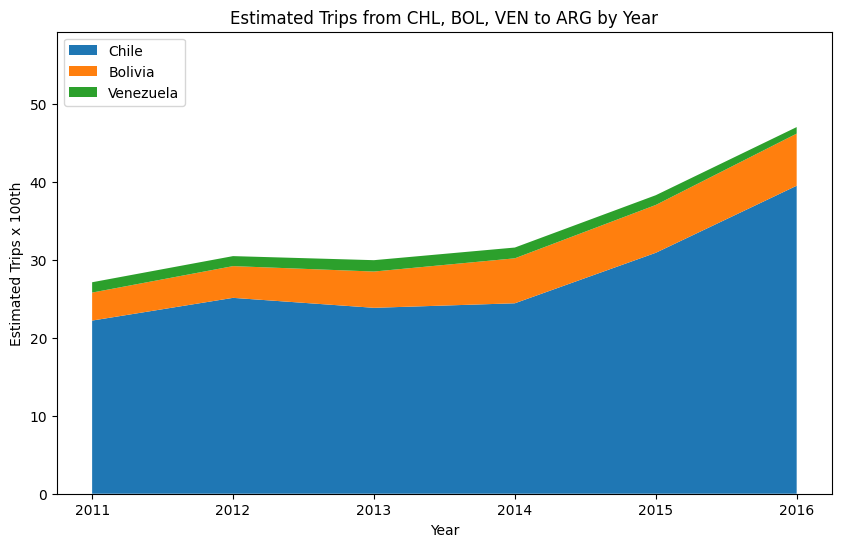

In [14]:
# Crear el gráfico de área
plt.figure(figsize=(10, 6))
plt.stackplot(pivot_data.index, pivot_data['CHL'], pivot_data['BOL'], pivot_data['VEN'],
              labels=['Chile', 'Bolivia', 'Venezuela'], colors=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Ajustar el eje Y
plt.ylim(0, pivot_data.values.max() * 1.5)  # Ajustar el límite superior un 10% por encima del valor máximo


plt.title('Estimated Trips from CHL, BOL, VEN to ARG by Year')
plt.xlabel('Year')
plt.ylabel('Estimated Trips x 100th')
plt.legend(loc='upper left')
plt.show()

## Trips to Argentina and Chile

In [23]:
# agrego a latam_df  una variable estimated_by_hundred_m que divida estimated_trips por 100000

latam_df['estimated_by_hundred_m'] = latam_df['estimated_trips'] / 100000


<ipython-input-23-74a5a7ec303d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latam_df['estimated_by_hundred_m'] = latam_df['estimated_trips'] / 100000


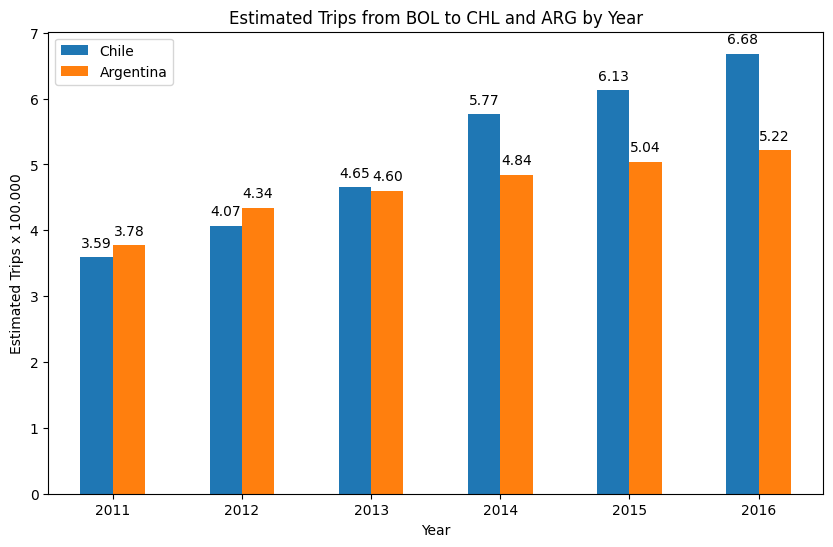

In [22]:

# Filtrar los datos para obtener solo los viajes desde BOL hacia CHL y ARG
filtered_data_bol = latam_df[(latam_df['source_iso3'] == 'BOL') & (latam_df['target_iso3'].isin(['CHL', 'ARG']))]

# Agrupar por año y país de destino, calculando la suma de estimated_by_hundred_m
trips_by_year = filtered_data_bol.groupby(['year', 'target_iso3'])['estimated_by_hundred_m'].sum().unstack()

# Crear el gráfico de barras
ax = trips_by_year.plot(kind='bar', figsize=(10, 6))

# Agregar el valor de estimated_by_hundred_m en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.title('Estimated Trips from BOL to CHL and ARG by Year')
plt.xlabel('Year')
plt.ylabel('Estimated Trips x 100.000')
plt.xticks(rotation=0)  # Evitar que las etiquetas del eje x se superpongan
plt.legend(['Chile', 'Argentina'])
plt.show()

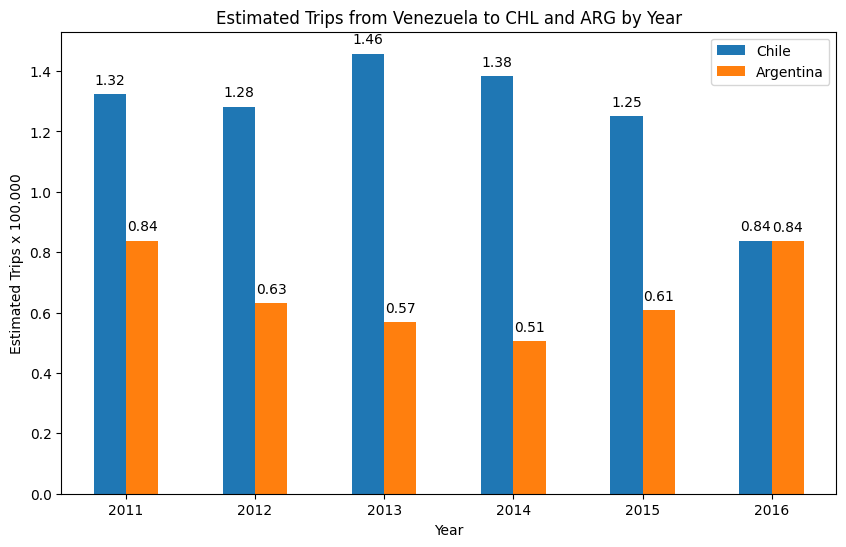

In [24]:

# Filtrar los datos para obtener solo los viajes desde BOL hacia CHL y ARG
filtered_data_ven = latam_df[(latam_df['source_iso3'] == 'VEN') & (latam_df['target_iso3'].isin(['CHL', 'ARG']))]

# Agrupar por año y país de destino, calculando la suma de estimated_by_hundred_m
trips_by_year = filtered_data_ven.groupby(['year', 'target_iso3'])['estimated_by_hundred_m'].sum().unstack()

# Crear el gráfico de barras
ax = trips_by_year.plot(kind='bar', figsize=(10, 6))

# Agregar el valor de estimated_by_hundred_m en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.title('Estimated Trips from Venezuela to CHL and ARG by Year')
plt.xlabel('Year')
plt.ylabel('Estimated Trips x 100.000')
plt.xticks(rotation=0)  # Evitar que las etiquetas del eje x se superpongan
plt.legend(['Chile', 'Argentina'])
plt.show()